# Analisando String em Pandas
* String
* wordcloud
* Expressoes regulares
* Análise de texto

In [366]:
monte = pd.Series(['Graham Chapman', 'John Cleese', 'Terry Gilliam',  'Eric Idle', 'Terry Jones', 'Michael Palin','Terry jones'])

In [367]:
monte

0    Graham Chapman
1    John Cleese   
2    Terry Gilliam 
3    Eric Idle     
4    Terry Jones   
5    Michael Palin 
6    Terry jones   
dtype: object

In [368]:
monte.describe()

count     7          
unique    7          
top       John Cleese
freq      1          
dtype: object

* String sao diferentes se possuirem diferentes combinacoes de letras minusculas e maiusculas
* 'Terry Jones' != 'Terry jones'

# Slice de string

In [369]:
monte.str[0:3]

0    Gra
1    Joh
2    Ter
3    Eri
4    Ter
5    Mic
6    Ter
dtype: object

In [373]:
monte.str[-3:]

0    man
1    ese
2    iam
3    dle
4    nes
5    lin
6    nes
dtype: object

# Contando frequência de palavras

In [374]:
monte.str.split(expand=True).stack().value_counts()

Terry      3
Gilliam    1
Michael    1
Eric       1
Graham     1
John       1
Palin      1
jones      1
Idle       1
Jones      1
Chapman    1
Cleese     1
dtype: int64

# Discretizando valores string (multivalorados) em uma coluna em diversas colunas
* Coluna info possui diferentes códigos para cada nome separados por caracterer pipe |
* A função get_dummies permite criar uma coluna para cada valor único e associar um valor 0 ou 1 em cada linha


In [387]:
full_monte = pd.DataFrame({'name': monte, 'info': ['B|C|D', 'B|D', 'A|C', 'B|D|E', 'B|C', 'B|C|D', 'C|B|D|E']})

In [388]:
full_monte

,name,info
0,Graham Chapman,B|C|D
1,John Cleese,B|D
2,Terry Gilliam,A|C
3,Eric Idle,B|D|E
4,Terry Jones,B|C
5,Michael Palin,B|C|D
6,Terry jones,C|B|D|E


In [389]:
full_monte['info'].describe()

count     7    
unique    6    
top       B|C|D
freq      2    
Name: info, dtype: object

In [391]:
dt=full_monte['info'].str.get_dummies('|')
print(dt)
print(dt.info())
print(dt.describe())

   A  B  C  D  E
0  0  1  1  1  0
1  0  1  0  1  0
2  1  0  1  0  0
3  0  1  0  1  1
4  0  1  1  0  0
5  0  1  1  1  0
6  0  1  1  1  1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 5 columns):
A    7 non-null int64
B    7 non-null int64
C    7 non-null int64
D    7 non-null int64
E    7 non-null int64
dtypes: int64(5)
memory usage: 408.0 bytes
None
              A         B         C         D         E
count  7.000000  7.000000  7.000000  7.000000  7.000000
mean   0.142857  0.857143  0.714286  0.714286  0.285714
std    0.377964  0.377964  0.487950  0.487950  0.487950
min    0.000000  0.000000  0.000000  0.000000  0.000000
25%    0.000000  1.000000  0.500000  0.500000  0.000000
50%    0.000000  1.000000  1.000000  1.000000  0.000000
75%    0.000000  1.000000  1.000000  1.000000  0.500000
max    1.000000  1.000000  1.000000  1.000000  1.000000


In [392]:
full_monte

,name,info
0,Graham Chapman,B|C|D
1,John Cleese,B|D
2,Terry Gilliam,A|C
3,Eric Idle,B|D|E
4,Terry Jones,B|C
5,Michael Palin,B|C|D
6,Terry jones,C|B|D|E


# unificando datasets - dummies

In [386]:
mp=full_monte.join(dt)
mp

,name,info,A,B,C,D
0,Graham Chapman,B|C|D,0,1,1,1
1,John Cleese,B|D,0,1,0,1
2,Terry Gilliam,A|C,1,0,1,0
3,Eric Idle,B|D,0,1,0,1
4,Terry Jones,B|C,0,1,1,0
5,Michael Palin,B|C|D,0,1,1,1
6,Terry jones,C|B|D,0,1,1,1


# Criando nuvem de palavras

In [393]:
#visualição de palavras
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt


# Usando uma linha

Graham Chapman


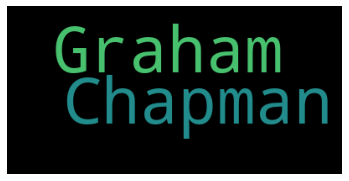

In [394]:
text = mp['name'][0]
print(text)
wordcloud = WordCloud().generate(text)

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

hubia hubia teste unesp hubia unesp hubia hubia hubia fiep fiep fiep fiep fiep fiep fiep fiep fiep fiep fiep fiep fiep fiep 


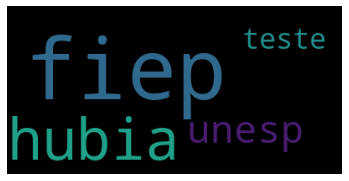

In [399]:
text = 'hubia hubia teste unesp hubia unesp hubia hubia hubia fiep fiep fiep fiep fiep fiep fiep fiep fiep fiep fiep fiep fiep fiep '
print(text)
wordcloud = WordCloud().generate(text)

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# dataset completo

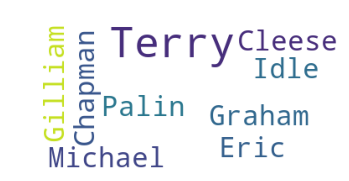

In [489]:
text = " ".join(review for review in mp['name'])

stopwords = set(STOPWORDS)
stopwords.add("Jones")
stopwords.add("john")
    
wordcloud = WordCloud(max_font_size=50, max_words=100, stopwords=stopwords, background_color="white").generate(text)

plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
# Obtendo arquivo recipe
* wget https://s3.amazonaws.com/openrecipes/20170107-061401-recipeitems.json.gz
* gunzip 20170107-061401-recipeitems.json.gz

# Lendo arquivo json (JavaScript Object Notation)
* Formato usado para manipulacao de dados em aplicações web

In [402]:
!head -n 2 /data/ds_test/20170107-061401-recipeitems.json

{ "_id" : { "$oid" : "5160756b96cc62079cc2db15" }, "name" : "Drop Biscuits and Sausage Gravy", "ingredients" : "Biscuits\n3 cups All-purpose Flour\n2 Tablespoons Baking Powder\n1/2 teaspoon Salt\n1-1/2 stick (3/4 Cup) Cold Butter, Cut Into Pieces\n1-1/4 cup Butermilk\n SAUSAGE GRAVY\n1 pound Breakfast Sausage, Hot Or Mild\n1/3 cup All-purpose Flour\n4 cups Whole Milk\n1/2 teaspoon Seasoned Salt\n2 teaspoons Black Pepper, More To Taste", "url" : "http://thepioneerwoman.com/cooking/2013/03/drop-biscuits-and-sausage-gravy/", "image" : "http://static.thepioneerwoman.com/cooking/files/2013/03/bisgrav.jpg", "ts" : { "$date" : 1365276011104 }, "cookTime" : "PT30M", "source" : "thepioneerwoman", "recipeYield" : "12", "datePublished" : "2013-03-11", "prepTime" : "PT10M", "description" : "Late Saturday afternoon, after Marlboro Man had returned home with the soccer-playing girls, and I had returned home with the..." }
{ "_id" : { "$oid" : "5160756d96cc62079cc2db16" }, "name" : "Hot Roast Beef Sa

# Manipulando formato json em python

In [403]:
try:
    recipes = pd.read_json('/data/ds_test/20170107-061401-recipeitems.json')
except ValueError as e: 
    print("ValueError:", e)

ValueError: Trailing data


* cada linha é um json único definido por um bloco { }

In [406]:
with open('/data/ds_test/20170107-061401-recipeitems.json') as f: 
    line = f.readline()
recipes =pd.read_json(line)

In [407]:
recipes

,_id,name,ingredients,url,image,ts,cookTime,source,recipeYield,datePublished,prepTime,description
$oid,5160756b96cc62079cc2db15,Drop Biscuits and Sausage Gravy,"Biscuits\n3 cups All-purpose Flour\n2 Tablespoons Baking Powder\n1/2 teaspoon Salt\n1-1/2 stick (3/4 Cup) Cold Butter, Cut Into Pieces\n1-1/4 cup Butermilk\n SAUSAGE GRAVY\n1 pound Breakfast Sausage, Hot Or Mild\n1/3 cup All-purpose Flour\n4 cups Whole Milk\n1/2 teaspoon Seasoned Salt\n2 teaspoons Black Pepper, More To Taste",http://thepioneerwoman.com/cooking/2013/03/drop-biscuits-and-sausage-gravy/,http://static.thepioneerwoman.com/cooking/files/2013/03/bisgrav.jpg,NaN,PT30M,thepioneerwoman,12,2013-03-11,PT10M,"Late Saturday afternoon, after Marlboro Man had returned home with the soccer-playing girls, and I had returned home with the..."
$date,NaN,Drop Biscuits and Sausage Gravy,"Biscuits\n3 cups All-purpose Flour\n2 Tablespoons Baking Powder\n1/2 teaspoon Salt\n1-1/2 stick (3/4 Cup) Cold Butter, Cut Into Pieces\n1-1/4 cup Butermilk\n SAUSAGE GRAVY\n1 pound Breakfast Sausage, Hot Or Mild\n1/3 cup All-purpose Flour\n4 cups Whole Milk\n1/2 teaspoon Seasoned Salt\n2 teaspoons Black Pepper, More To Taste",http://thepioneerwoman.com/cooking/2013/03/drop-biscuits-and-sausage-gravy/,http://static.thepioneerwoman.com/cooking/files/2013/03/bisgrav.jpg,1.365276e+12,PT30M,thepioneerwoman,12,2013-03-11,PT10M,"Late Saturday afternoon, after Marlboro Man had returned home with the soccer-playing girls, and I had returned home with the..."


In [408]:
type(recipes)

pandas.core.frame.DataFrame

In [409]:
# lendo o arquivo inteiro
with open('/data/ds_test/20170107-061401-recipeitems.json', 'r') as f:
    # extraindo cada linha
    data = (line.strip() for line in f)
    # transformando cada linha em um elemento de lista 
    data_json = "[{0}]".format(','.join(data))
#lendo json
recipes = pd.read_json(data_json)

In [410]:
recipes.shape

(173278, 17)

In [412]:
recipes.iloc[11]

_id                   {'$oid': '5160757a96cc62079cc2db1b'}                                                                                                                                                                                                                                           
name                  Pretty, Yummy Fruit Salad                                                                                                                                                                                                                                                      
ingredients           1 cup Sugar\n1 cup Water\n Juice Of 1 Orange\n Zest Of 1 Orange\n2 whole Vanilla Beans, Caviar Scraped Out (or 2 Teaspoons Vanilla Extract)\n4 pints Strawberries, Hulled And Halved\n2 pints Blueberries\n2 cups Red Grapes, Halved\n2 cups Green Grapes, Havled\n Mint Leaves
url                   http://thepioneerwoman.com/cooking/2013/03/pretty-fruit-salad/                                  

# Algumas colunas desse dataset estao em formato de string

In [413]:
print(recipes.ingredients.describe())
print(recipes.description.describe())


count     173278          
unique    163166          
top       \n\n\n\n\n\n\n\n
freq      507             
Name: ingredients, dtype: object
count     158068                                                                                                     
unique    153086                                                                                                     
top       Recipes, cooking techniques, and news, updated daily. Chow.com - devoted to the pleasure of food and drink.
freq      111                                                                                                        
Name: description, dtype: object


In [414]:
pd.set_option('display.max_colwidth', -1)
recipes.iloc[0].description



'Late Saturday afternoon, after Marlboro Man had returned home with the soccer-playing girls, and I had returned home with the...'

In [415]:
recipes['ingredients'].str.split(expand=True).stack().value_counts()

1                694957
2                344330
cups             309396
cup              268092
teaspoon         171032
                  ...  
TAGINE           1     
TOGETHER:        1     
oz]              1     
demarcation      1     
replacement.)    1     
Length: 56457, dtype: int64

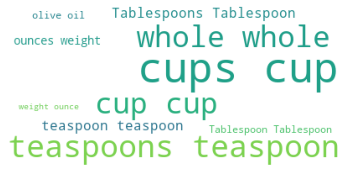

In [416]:
text = " ".join(review for review in recipes['ingredients'])

wordcloud = WordCloud(max_font_size=50, max_words=10, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

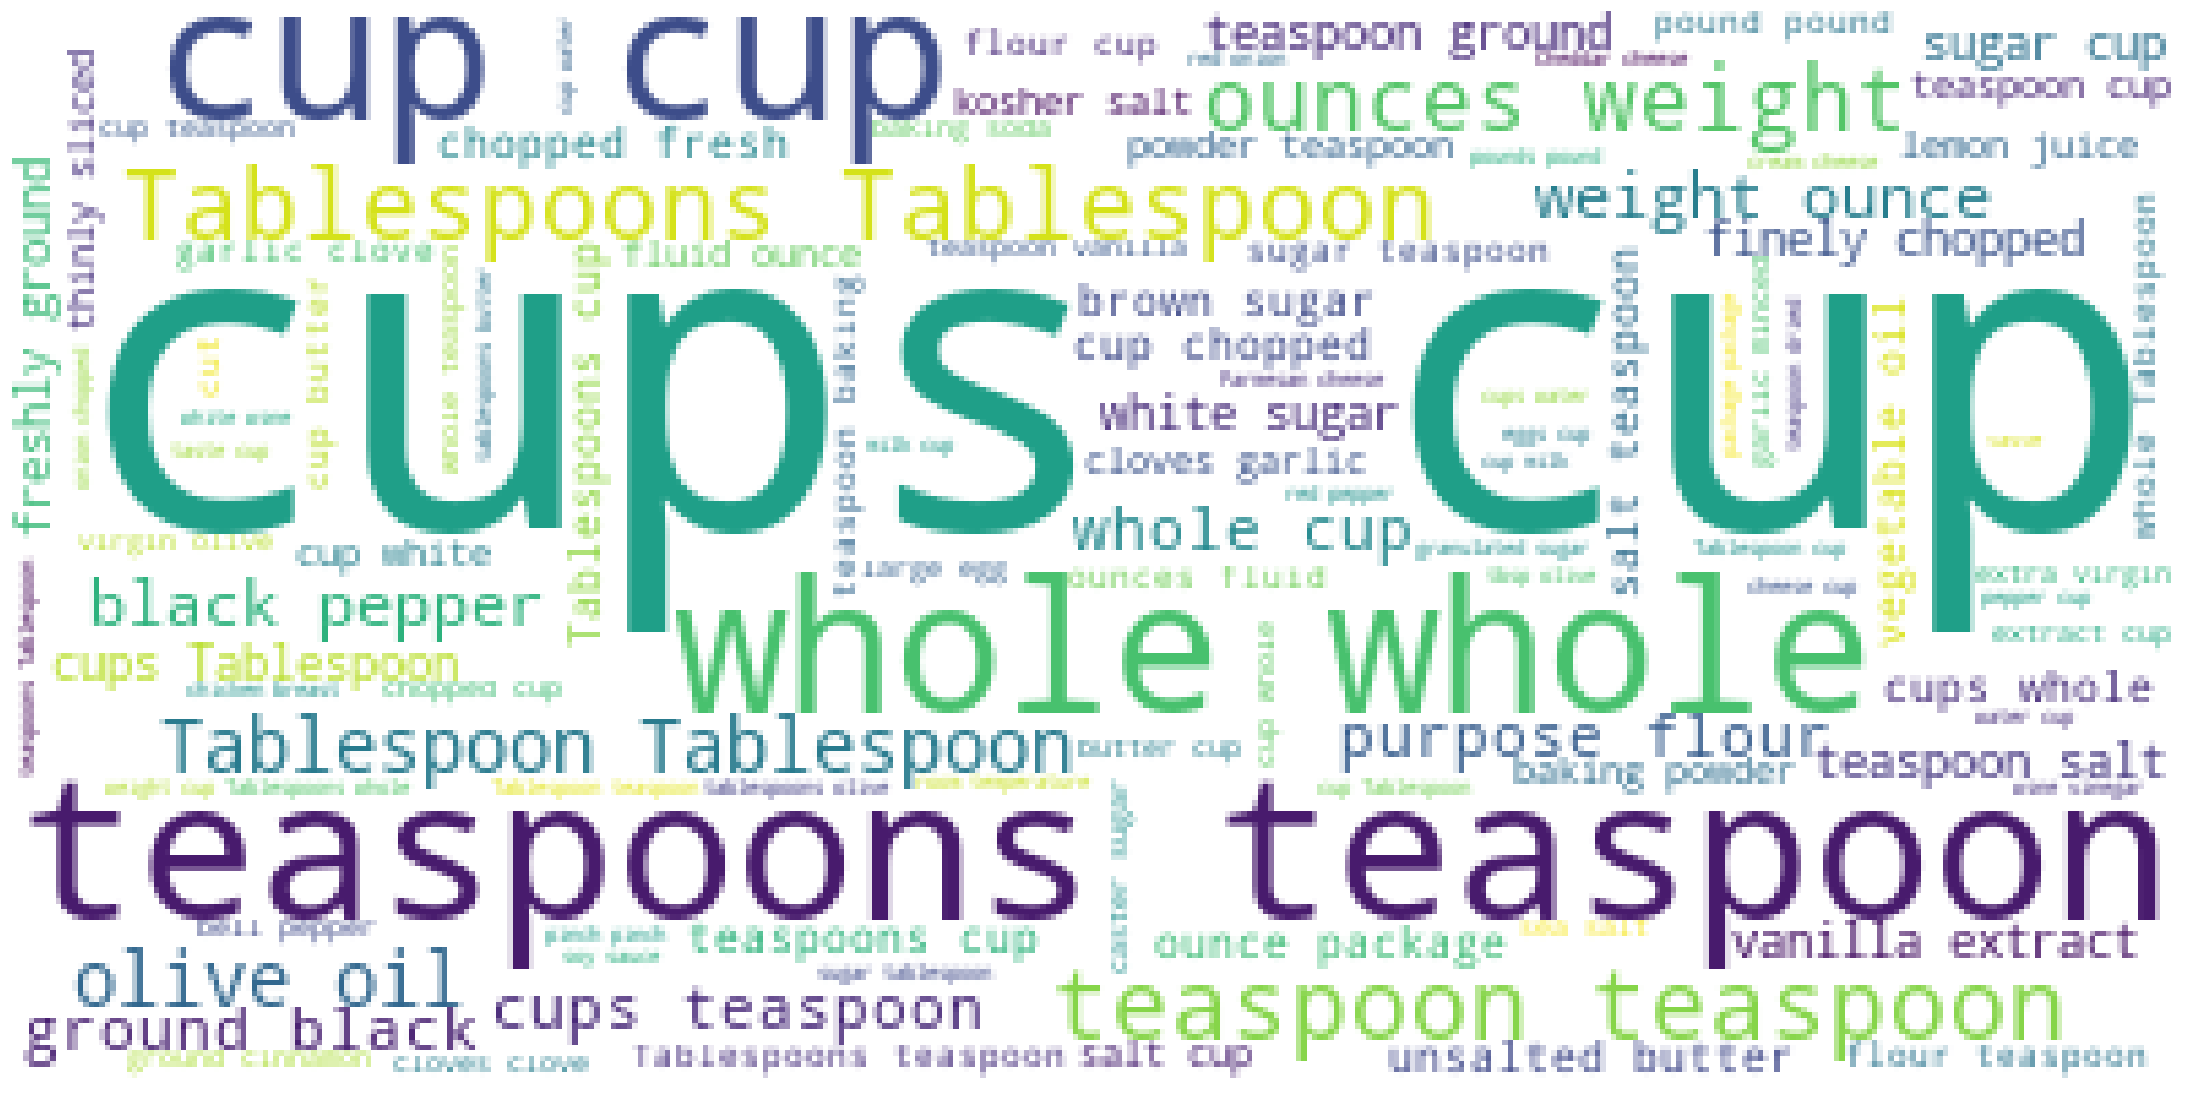

In [418]:
text = " ".join(review for review in recipes['ingredients'])

wordcloud = WordCloud(max_font_size=80, max_words=200, background_color="white").generate(text)
plt.figure(figsize=(100,20))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [422]:
recipes['description2']=recipes['description'].fillna('naotem')

In [ ]:
text = " ".join(review for review in recipes['description2'])

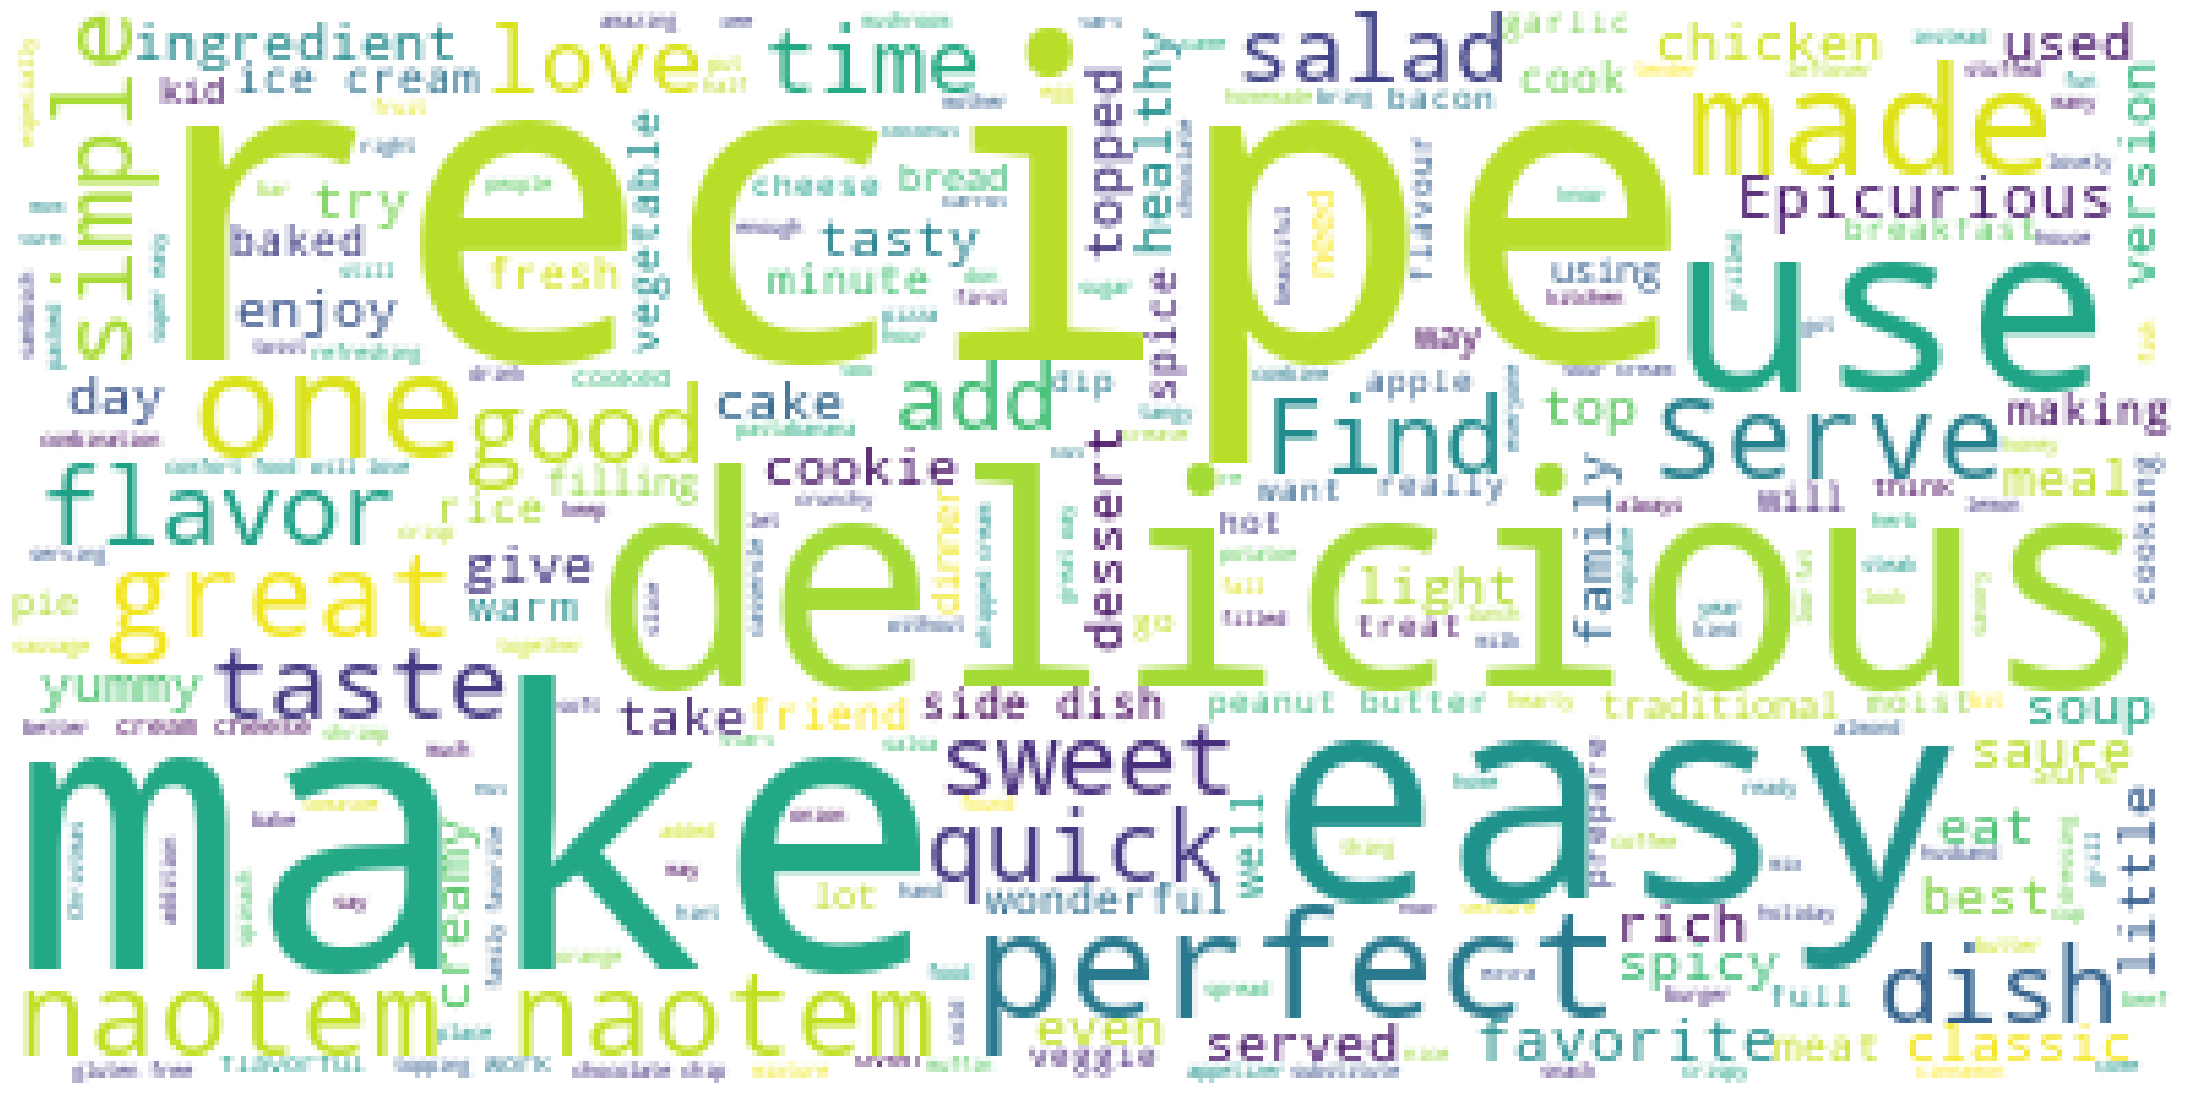

In [425]:


wordcloud = WordCloud(max_font_size=80, max_words=5000, background_color="white", ).generate(text)
plt.figure(figsize=(100,20))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [421]:
recipes.iloc[25]

_id                   {'$oid': '5160758396cc6207b8ac8431'}                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            
name                  Kale Artichoke Dip with Greek Yogurt                                                                                                                                                                                                                                                                                                                                                                                                       

# expressoes regulares
* Usadas para encontrar padrões em texto

#  O exemplo a seguir verifica se o padrão 123 está presente na variável s
Comandos possíveis:
    * in
    * find
    * index

In [428]:
s = 'foo123bar'
print('123' in s)
print(s.find('123'))
print(s.index('123'))

True
3
3


# Esses comandos funcionam para padrões simples, 
* Para padrões mais complexos, como por exemplo, procure uma sequencia de quaisquer 3 números, tais métodos não retornam  respostas diretas

* REs apareceram em muitas linguagens de programação, editores e outras ferramentas como um meio de determinar se uma string corresponde a um padrão especificado. 
* No python aparece no módulo re

In [81]:
import re

# funçAo match retorna se o padrão casa perfeitamente com a sequência

* re.search (<regex>, <string>) 
    * percorre uma <string> procurando o primeiro local onde o padrão <regex> corresponde. 
    * Se uma correspondência for encontrada, re.search () retorna um objeto de correspondência. 
    * Caso contrário, ele retorna None.
    * O objeto retorna possui uma função chamada span que retorna a primeira posição na sequência na qual o padrão foi encontrado
    

In [430]:
s = 'foo123bar'

import re

res = re.search('123', s)
print(res)
print(type(res))
print(res.span())
print(res.span()[0])
print(res.span()[1])

<re.Match object; span=(3, 6), match='123'>
<class 're.Match'>
(3, 6)
3
6


*  retorna sempre o primeiro elemento encontrado

In [431]:
s = 'foo123bar123'

import re

res = re.search('123', s)
print(res)
print(res.span())
print(res.span()[0])
print(res.span()[1])

<re.Match object; span=(3, 6), match='123'>
(3, 6)
3
6


# caracteres especiais
*. (ponto) qualquer coisa numa dada posição (exceto quebra de linha)
* exemplo: foo qualquer caracter bar
* buscando no início do texto ^ /ou \A
* buscando no fim do texto $ ou \Z
* buscando qualquer padrao no conjunto []

In [450]:
pattern = r"foo.bar"
sequence = "foo5bar"

print(re.search(pattern, sequence))

pattern = r"^Cookie"
sequence = "vamos comer Cookie agora, amanha não haverá mais Cookies por aqui"

print(re.search(pattern, sequence))

pattern = r"^vamos"
sequence = "vamos comer Cookie agora, amanha não vamos mais ter  Cookies por aqui"

print(re.search(pattern, sequence))

pattern = r"aqui"
sequence = "vamos comer Cookie agora, amanha aqui não vamos mais ter  Cookies por aqui"

print(re.search(pattern, sequence))

pattern = r"[as]"
sequence = "vamos comer Cookie agora, amanha não vamos mais ter  Cookies por aqui"

print(re.search(pattern, sequence))

<re.Match object; span=(0, 7), match='foo5bar'>
None
<re.Match object; span=(0, 5), match='vamos'>
<re.Match object; span=(33, 37), match='aqui'>
<re.Match object; span=(1, 2), match='a'>


In [453]:
print(re.search(r'[0-6]', 'Number: 5'))
print(re.search(r'[0-6]', 'Number:33 and Number:4'))

<re.Match object; span=(8, 9), match='5'>
<re.Match object; span=(7, 8), match='3'>


# \w match se for alfanumérico 
# \W match se nao for alfanumérico
* corresponde a qualquer caractere alfanumérico de palavra. 
* Os caracteres das palavras são letras maiúsculas e minúsculas, dígitos e o caractere sublinhado (_), 
* Essencialmente uma abreviação de [a-zA-Z0-9_]:

# \d ou match se for número [0-9]
#  \D match se não for número [^0-9]
# \s match se é um espaço

#r na frente de uma string transforma os caracteres de escape em caracteres comuns

In [462]:
print(re.search('\w', '#(.a$@&'))

print(re.search('\W', 'bvc0!#(.a$@&'))

print(re.search('[a-zA-Z0-9_]', '#(.a$@&'))

print(re.search('\d', 'abc4def'))
print(re.search('\D', '234Q678'))

# RE interpreta escape \n
print(re.search('\s', 'f\noobar baz'))
# String passada ao re transforma escape para caracter normal
print(re.search('\s', r'f\noobar baz'))

<re.Match object; span=(3, 4), match='a'>
<re.Match object; span=(4, 5), match='!'>
<re.Match object; span=(3, 4), match='a'>
<re.Match object; span=(3, 4), match='4'>
<re.Match object; span=(3, 4), match='Q'>
<re.Match object; span=(1, 2), match='\n'>
<re.Match object; span=(8, 9), match=' '>


# metacaracteres combinados em []

In [464]:
print(re.search('[\d\w\s]', '---3---'))
print(re.search('[\d\w\s]', '---a---'))
print(re.search('[\d\w\s]', '--- ---'))
print(re.search('[\d\w\s]', '------'))


<re.Match object; span=(3, 4), match='3'>
<re.Match object; span=(3, 4), match='a'>
<re.Match object; span=(3, 4), match=' '>
None


In [ ]:
# removendo função do caracter especial \

In [465]:
print(re.search('.', 'foo.bar'))
print(re.search('\.', 'foo.bar'))

<re.Match object; span=(0, 1), match='f'>
<re.Match object; span=(3, 4), match='.'>


In [467]:
s = r'foo\bar'
#print(re.search('\\', s))
print(re.search('\\\\', s))
print(re.search(r'\\', s))

error: bad escape (end of pattern) at position 0

In [ ]:
# repetições

# (*) ou *? Qualquer coisa em qualquer quantidade entre foo e bar

In [468]:
print(re.search('foo-*bar', 'foobar'))
print(re.search('foo-*bar', 'foo-bar'))
print(re.search('foo-*bar', 'foo------bar'))

print(re.search('foo-*?bar', 'foobar'))
print(re.search('foo-*?bar', 'foo-bar'))
print(re.search('foo-*?bar', 'foo--bar'))

<re.Match object; span=(0, 6), match='foobar'>
<re.Match object; span=(0, 7), match='foo-bar'>
<re.Match object; span=(0, 12), match='foo------bar'>
<re.Match object; span=(0, 6), match='foobar'>
<re.Match object; span=(0, 7), match='foo-bar'>
<re.Match object; span=(0, 8), match='foo--bar'>


In [ ]:
# match de palavra com quaisquer sequencias entre duas sequencias fixas

In [469]:
re.search('foo.*bar', '# foo $qux@grault % bar #')

<re.Match object; span=(2, 23), match='foo $qux@grault % bar'>

# Usando caracter + ou +? pelo menos um

In [470]:
print(re.search('foo-+bar', 'foobar'))
print(re.search('foo-+bar', 'foo-bar'))
print(re.search('foo-+bar', 'foo--bar'))

print(re.search('foo-+?bar', 'foobar'))
print(re.search('foo-+?bar', 'foo-bar'))
print(re.search('foo-+?bar', 'foo--bar'))

None
<re.Match object; span=(0, 7), match='foo-bar'>
<re.Match object; span=(0, 8), match='foo--bar'>
None
<re.Match object; span=(0, 7), match='foo-bar'>
<re.Match object; span=(0, 8), match='foo--bar'>


# caracter - match de nenhum ou um ? ou ??

In [471]:
print(re.search('foo-?bar', 'foobar'))
print(re.search('foo-?bar', 'foo-bar'))
print(re.search('foo-?bar', 'foo--bar'))

print(re.search('foo-??bar', 'foobar'))
print(re.search('foo-??bar', 'foo-bar'))
print(re.search('foo-??bar', 'foo--bar'))

<re.Match object; span=(0, 6), match='foobar'>
<re.Match object; span=(0, 7), match='foo-bar'>
None
<re.Match object; span=(0, 6), match='foobar'>
<re.Match object; span=(0, 7), match='foo-bar'>
None


In [473]:
print(re.match('foo[1-9]*bar', 'foobar'))
print(re.match('foo[1-9]*bar', 'foo4276765bar'))
print(re.match('foo[1-9]+bar', 'foobar'))
print(re.match('foo[1-9]+bar', 'foo42bar'))
print(re.match('foo[1-9]?bar', 'foobar'))
print(re.match('foo[1-9]?bar', 'foo42bar'))

<re.Match object; span=(0, 6), match='foobar'>
<re.Match object; span=(0, 13), match='foo4276765bar'>
None
<re.Match object; span=(0, 8), match='foo42bar'>
<re.Match object; span=(0, 6), match='foobar'>
None


In [488]:
m = re.search('(\w+),(\w+),(\d*)', 'foo,quux,88')
m

<re.Match object; span=(0, 11), match='foo,quux,88'>

In [ ]:
# Listando os grupos de sequencias que deram match

In [168]:
print(m.groups())
print(m.groups()[2])

('foo', 'quux', 'baz')
baz


# Buscando todos os matches possíveis
* findall retorna todos match
* um loop pode ser usado para percorre instancias
* finditer retorna também a posição na saída original

In [181]:
m = re.findall('ba?', 'bar baz baba foo ke')
print(m)

m = re.findall('ba?', 'bar baz baba foo ke')
for aa in m:
    print(aa)

m = re.finditer('ba?', 'bar baz baba foo ke')
for aa in m:
    print(aa)

['ba', 'ba', 'ba', 'ba']
ba
ba
ba
ba
<re.Match object; span=(0, 2), match='ba'>
<re.Match object; span=(4, 6), match='ba'>
<re.Match object; span=(8, 10), match='ba'>
<re.Match object; span=(10, 12), match='ba'>


# Para aplicar Expressoes em um series podemos usar a função str.extract

In [208]:
s = pd.Series(['a1', 'b2', 'c3'])
s.str.extract(r'([ab])(\d)')


,0,1
0,a,1
1,b,2
2,NaN,NaN


# Exemplos com o dataset de receitas
* Receitas que contém palavras específicas na descrição

In [73]:
print(recipes.description.str.contains('[Bb]reakfast').sum())
print(recipes.ingredients.str.contains('[Cc]innamon').sum())
print(recipes.ingredients.str.contains('[Cc]inamon').sum())

3524

# criando colunas dummy com palavras de interesse
* Uma expressao regular é aplicada em cada linha do dataframe, verificando se uma data coluna Ingredients, contem alguma das palavras a seguir
* O comando dict cria uma coluna para item da lista spice_list e associa true ou false dependendo do resultado da expressao regular (existe ou nao existe) a palavra no campo Ingredients

In [76]:
spice_list = ['salt', 'pepper', 'oregano', 'sage', 'parsley', 'rosemary', 'tarragon', 'thyme', 'paprika', 'cumin']

In [78]:
import re

spice_df = pd.DataFrame(

dict((spice, recipes.ingredients.str.contains(spice, re.IGNORECASE)) for spice in spice_list))

spice_df.head()

,salt,pepper,oregano,sage,parsley,rosemary,tarragon,thyme,paprika,cumin
0,False,False,False,True,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,True,True,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False


In [328]:
spice_df

,salt,pepper,oregano,sage,parsley,rosemary,tarragon,thyme,paprika,cumin
0,False,False,False,True,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,True,True,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
173273,False,False,False,False,False,False,False,False,False,False
173274,False,False,False,False,False,False,False,False,False,False
173275,True,True,False,False,False,False,False,False,True,True
173276,True,True,False,False,False,False,False,False,False,False


In [79]:
selection = spice_df.query('parsley & paprika & tarragon')
len(selection)

10

In [80]:
recipes.name[selection.index]

2069      All cremat with a Little Gem, dandelion and wa...
74964                         Lobster with Thermidor butter
93768      Burton's Southern Fried Chicken with White Gravy
113926                     Mijo's Slow Cooker Shredded Beef
137686                     Asparagus Soup with Poached Eggs
140530                                 Fried Oyster Po’boys
158475                Lamb shank tagine with herb tabbouleh
158486                 Southern fried chicken in buttermilk
163175            Fried Chicken Sliders with Pickles + Slaw
165243                        Bar Tartine Cauliflower Salad
Name: name, dtype: object